In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
ξ = binary state pattern = S
N = number of patterns
X = (x1, . . . , xN )
largest pattern M = max(x)
The state (query) pattern is ξ ∈ R
log-sum-exp function (lse) for 0 < β

In [4]:
inp_size = 3

N = torch.tensor(2)
X = torch.randn(inp_size, N) # tout les pattern stored

M = torch.max(X).item()
state = torch.randn(inp_size,)

In [57]:
lse = -torch.logsumexp(torch.matmul(X.T, state), 0) # float
quad = torch.dot(state, state)*0.5 # float
divers = torch.log(N) + M**2 * 0.5 # float

E = lse + quad + divers # float

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 28x28)

In [6]:
new_state = X @ torch.softmax(torch.matmul(X.T, state), 0) # (inp_size)

In [7]:
class Hopfield(nn.Module):
    def __init__(self, X):
        self.X = X # (inp_size, num_aptterns)
        self.N = torch.tensor(X.shape[1]) # number of patterns
        self.M = torch.max(X)
    
    def energie_fn(self, state):
        lse = -torch.logsumexp(torch.matmul(self.X.T, state), 0) # float
        quad = torch.dot(state, state) # float
        divers = torch.log(self.N) + self.M**2 * 0.5 # float

        E = lse + quad + divers # float
        return E
    
    def forward(self, state):
        new_state = self.X @ torch.softmax(torch.matmul(self.X.T, state), 0) # (inp_size)
        return new_state

In [1]:
class ReinforcementHopfield(nn.Module):
    def __init__(self, inp_size):
        self.inp_size = inp_size
        self.X = torch.zeros(inp_size, 1)
        
    def energie_fn(self, state):
        lse = -torch.logsumexp(torch.matmul(self.X.T, state), 0) # float
        quad = torch.dot(state, state) # float
        divers = torch.log(self.N) + self.M**2 * 0.5 # float

        E = lse + quad + divers # float
        return E
    
    def predict(self, state):
        new_state = self.X @ torch.softmax(torch.matmul(self.X.T, state), 0) # (inp_size)
        return new_state
    
    def forward(self, x):
        X = torch.cat((X, x), axis=1)
        

NameError: name 'nn' is not defined

In [8]:
X = torch.tensor([[0, 0, 1], [1, 0, 0]]).view(3, 2).float() # (1, 3)
state = torch.randn(3)

Nn = Hopfield(X)
for i in range(4):
    E = Nn.energie_fn(state)
    print(E)
    state = Nn.forward(state)
    print(state)

tensor(4.9123)
tensor([0., 1., 0.])
tensor(0.5000)
tensor([0., 1., 0.])
tensor(0.5000)
tensor([0., 1., 0.])
tensor(0.5000)
tensor([0., 1., 0.])


In [9]:
Nn.forward(torch.tensor([[0.1, 0.9, 1.1]]).float().view(3, 1))

tensor([0., 1., 0.])

## test mnist

In [58]:
data = datasets.MNIST('../data', train=True, download=True)

In [59]:
img = torchvision.transforms.functional.pil_to_tensor(data[0][0])

In [97]:
imgs = torch.stack([torchvision.transforms.functional.pil_to_tensor(data[i][0]).flatten().float() for i in range(300)], 1) # (784, 20)
net = Hopfield(imgs)
state = torch.randn(imgs.shape[0])

#for i in range(10):
#    new_state = net.forward(state)
    

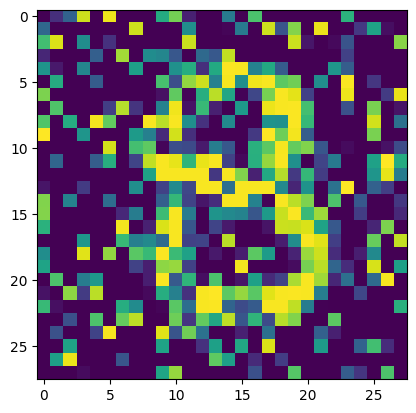

In [131]:
x = torchvision.transforms.functional.pil_to_tensor(data[352][0]).squeeze(0)

#x[0:20, 10:20] = 1
for i in range(350):
    x[random.randint(0, 27), random.randint(0, 27)] = random.randint(0, 255)

x = np.array(x.data)
plt.imshow(x)



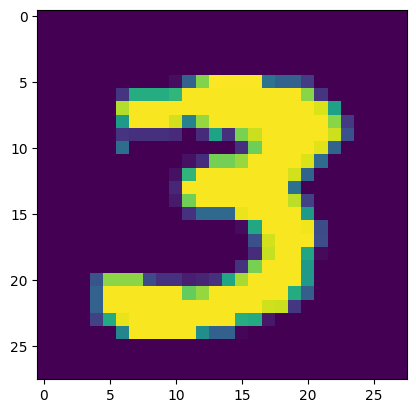

In [132]:
state = torch.from_numpy(x).flatten().float()
state = net.forward(state).view(28, 28)
plt.imshow(state)